In [1]:
import tensorflow as tf
import numpy as np
import pickle
np.random.seed(7)

In [2]:
with open ('C:\\Users\\Wilfred\\Desktop\\better-of-two\\input_layer_4_6_14_2.pickle','rb') as file:
    input_data = pickle.load(file)
permutation = list(np.random.permutation(input_data.shape[0]))
input_data = input_data[permutation,:]
print(input_data.shape)
x_train = input_data[:100000, :]
x_test = input_data[100000:105000, :]


(105000, 24)


In [3]:
with open ('C:\\Users\\Wilfred\\Desktop\\better-of-two\\output_layer_4_6_14_2.pickle','rb') as file:
    output_data = pickle.load(file)
print(output_data.shape)
#output_data = np.transpose(output_data)
output_data = output_data[permutation,:]
y_train = output_data[:100000, :]
y_test = output_data[100000:105000, :]
print(output_data.shape)

(105000, 12)
(105000, 12)


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(150, input_shape = [24], activation = 'relu'),
    #tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.005)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 130, verbose = 2, validation_data = (x_test, y_test))


Train on 100000 samples, validate on 5000 samples
Epoch 1/130
100000/100000 - 3s - loss: 0.3747 - accuracy: 0.8442 - val_loss: 0.2930 - val_accuracy: 0.8727
Epoch 2/130
100000/100000 - 2s - loss: 0.2597 - accuracy: 0.8872 - val_loss: 0.2365 - val_accuracy: 0.8965
Epoch 3/130
100000/100000 - 2s - loss: 0.2197 - accuracy: 0.9042 - val_loss: 0.2137 - val_accuracy: 0.9052
Epoch 4/130
100000/100000 - 2s - loss: 0.2038 - accuracy: 0.9110 - val_loss: 0.2008 - val_accuracy: 0.9130
Epoch 5/130
100000/100000 - 2s - loss: 0.1932 - accuracy: 0.9155 - val_loss: 0.1927 - val_accuracy: 0.9160
Epoch 6/130
100000/100000 - 2s - loss: 0.1860 - accuracy: 0.9189 - val_loss: 0.1867 - val_accuracy: 0.9204
Epoch 7/130
100000/100000 - 2s - loss: 0.1784 - accuracy: 0.9229 - val_loss: 0.1783 - val_accuracy: 0.9241
Epoch 8/130
100000/100000 - 2s - loss: 0.1676 - accuracy: 0.9280 - val_loss: 0.1672 - val_accuracy: 0.9277
Epoch 9/130
100000/100000 - 2s - loss: 0.1551 - accuracy: 0.9325 - val_loss: 0.1542 - val_accu

Epoch 77/130
100000/100000 - 2s - loss: 0.0386 - accuracy: 0.9853 - val_loss: 0.0689 - val_accuracy: 0.9775
Epoch 78/130
100000/100000 - 2s - loss: 0.0378 - accuracy: 0.9856 - val_loss: 0.0596 - val_accuracy: 0.9800
Epoch 79/130
100000/100000 - 2s - loss: 0.0361 - accuracy: 0.9863 - val_loss: 0.0588 - val_accuracy: 0.9811
Epoch 80/130
100000/100000 - 2s - loss: 0.0364 - accuracy: 0.9862 - val_loss: 0.0578 - val_accuracy: 0.9807
Epoch 81/130
100000/100000 - 2s - loss: 0.0343 - accuracy: 0.9870 - val_loss: 0.0655 - val_accuracy: 0.9791
Epoch 82/130
100000/100000 - 2s - loss: 0.0350 - accuracy: 0.9869 - val_loss: 0.0661 - val_accuracy: 0.9772
Epoch 83/130
100000/100000 - 2s - loss: 0.0357 - accuracy: 0.9866 - val_loss: 0.0582 - val_accuracy: 0.9812
Epoch 84/130
100000/100000 - 2s - loss: 0.0329 - accuracy: 0.9877 - val_loss: 0.0622 - val_accuracy: 0.9800
Epoch 85/130
100000/100000 - 2s - loss: 0.0338 - accuracy: 0.9872 - val_loss: 0.0648 - val_accuracy: 0.9794
Epoch 86/130
100000/100000 -

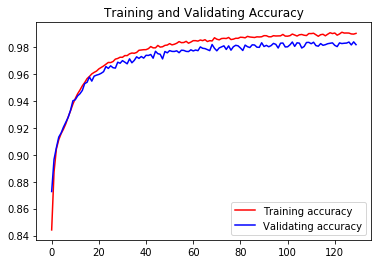

In [6]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
#plt.title('Training Accuracy')
plt.legend()
plt.show()

In [8]:
#model.evaluate(x_test, y_test, verbose = 2)

5000/1 - 0s - loss: 0.0630 - accuracy: 0.9720


[0.04715186712741852, 0.9720002]

In [7]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Better_of_Two\\Better_of_Two_4_6_14_2_model.h5')